In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from scipy.stats import zscore, ks_2samp
import fancyimpute 
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer 

In [3]:
df = pd.read_pickle(r'\\popnasal07.bnhpgroup.com\Departments\DIGITALFACTORY\GENERAL\קורס DS - AIRBNB\final.pkl')
df

,review_date,Comments,Listing ID,Listing Name,Host ID,Host Response Time,Host Response Rate,Is Superhost,Neighborhood Group,Latitude,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,review_mnt,Host_tenure
45,2018-01-24,Caroline war eine sehr nette Gastgeberin. Sie ...,10008354,Cosy studio in Weserstr.,26193350,<NA>,NaN,False,NeukÃÂ¶lln,52.47888,...,91.0,9.0,9.0,10.0,10.0,9.0,9.0,True,1,3.956194
64,2018-04-07,Check-in/-out verlief reibungslos!KÃÂ¼nstleri...,10012243,Raw / Minimalist Apartment NeukÃÂ¶lln,51421188,<NA>,NaN,False,NeukÃÂ¶lln,52.48730,...,92.0,10.0,9.0,10.0,10.0,9.0,9.0,True,4,3.044490
65,2018-04-22,FÃÂ¼r ein WE Ausflug fÃÂ¼r Paare geeignet. D...,10012243,Raw / Minimalist Apartment NeukÃÂ¶lln,51421188,<NA>,NaN,False,NeukÃÂ¶lln,52.48730,...,92.0,10.0,9.0,10.0,10.0,9.0,9.0,True,4,3.044490
66,2018-05-28,Fritz has a really nice flat in a cosy neighbo...,10012243,Raw / Minimalist Apartment NeukÃÂ¶lln,51421188,<NA>,NaN,False,NeukÃÂ¶lln,52.48730,...,92.0,10.0,9.0,10.0,10.0,9.0,9.0,True,5,3.044490
71,2018-09-30,"Carlos place is amazing, nicely decorated, goo...",10012834,Two cozy rooms in Kreuzberg,47884220,<NA>,NaN,False,Friedrichshain-Kreuzberg,52.50288,...,100.0,10.0,10.0,9.0,10.0,10.0,10.0,False,9,3.164956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456921,2018-12-15,"Great location; comfortable, clean & quiet acc...",9994644,Potsdamer Platz-Top Spot Studio 1,22276081,within an hour,1.0,True,Friedrichshain-Kreuzberg,52.50283,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,True,12,4.229979
456922,2018-12-17,Great location and great host. Martin provides...,9994644,Potsdamer Platz-Top Spot Studio 1,22276081,within an hour,1.0,True,Friedrichshain-Kreuzberg,52.50283,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,True,12,4.229979
456923,2018-12-24,This place is awesome! it has everything from ...,9994644,Potsdamer Platz-Top Spot Studio 1,22276081,within an hour,1.0,True,Friedrichshain-Kreuzberg,52.50283,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,True,12,4.229979
456924,2018-12-27,"Martin's home is great, the location is perfec...",9994644,Potsdamer Platz-Top Spot Studio 1,22276081,within an hour,1.0,True,Friedrichshain-Kreuzberg,52.50283,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,True,12,4.229979


## Data Protocol

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 


# Type of valaues
df.dtypes.to_excel(r"\\popnasal07.bnhpgroup.com\Departments\DIGITALFACTORY\GENERAL\קורס DS - AIRBNB\Final Project\Data Protocol\AirBNB_datatype.xlsx", sheet_name='data_type')
# Maximum valaues
df.max().to_excel(r"\\popnasal07.bnhpgroup.com\Departments\DIGITALFACTORY\GENERAL\קורס DS - AIRBNB\Final Project\Data Protocol\max_AirBNB.xlsx", sheet_name='max')
# Minimum Values
df.min().to_excel(r"\\popnasal07.bnhpgroup.com\Departments\DIGITALFACTORY\GENERAL\קורס DS - AIRBNB\Final Project\Data Protocol\min_AirBNB.xlsx", sheet_name='min')
# Missing Values
df.isnull().sum(axis=0).to_excel(r"\\popnasal07.bnhpgroup.com\Departments\DIGITALFACTORY\GENERAL\קורס DS - AIRBNB\Final Project\Data Protocol\NA_AirBNB.xlsx", sheet_name='NA')
# exporting results to the protocol
df.nunique().to_excel(r"\\popnasal07.bnhpgroup.com\Departments\DIGITALFACTORY\GENERAL\קורס DS - AIRBNB\Final Project\Data Protocol\unique_AirBNB.xlsx", sheet_name='unique')



## General checks before starting the EDA process

In [4]:
df['Communication Rating'].value_counts(dropna=False) 

Communication Rating
10.0    129740
9.0      25329
8.0       1571
NaN        166
7.0        124
6.0         53
5.0         13
4.0          9
2.0          9
Name: count, dtype: int64

In [5]:
df.shape

(157014, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157014 entries, 45 to 456925
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   review_date           157014 non-null  datetime64[ns]
 1   Comments              156911 non-null  string        
 2   Listing ID            157014 non-null  int64         
 3   Listing Name          156983 non-null  string        
 4   Host ID               157014 non-null  int64         
 5   Host Response Time    141106 non-null  string        
 6   Host Response Rate    141106 non-null  float64       
 7   Is Superhost          157014 non-null  bool          
 8   Neighborhood Group    157014 non-null  string        
 9   Latitude              157014 non-null  float64       
 10  Longitude             157014 non-null  float64       
 11  Is Exact Location     157014 non-null  bool          
 12  Property Type         157014 non-null  string        
 13  Roo

In [7]:
df['Min Nights'].value_counts(dropna=False) 

Min Nights
2      51555
1      46917
3      36313
4       9504
5       5188
       ...  
300        1
72         1
87         1
200        1
900        1
Name: count, Length: 71, dtype: int64

# EDA

In [8]:
df.describe()

,review_date,Listing ID,Host ID,Host Response Rate,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,review_mnt,Host_tenure
count,157014,1.570140e+05,1.570140e+05,141106.000000,157014.000000,157014.000000,157014.000000,156879.000000,156833.000000,156989.000000,...,157014,156849.000000,156850.000000,156850.000000,156847.000000,156848.000000,156847.000000,156847.000000,157014.0,157014.000000
mean,2018-07-19 18:42:19.218159616,1.498746e+07,5.400128e+07,0.959958,52.512652,13.402375,3.117945,1.100683,1.206328,1.918466,...,2019-03-21 21:28:45.507279104,94.836652,9.781377,9.511807,9.813793,9.813539,9.647402,9.441124,7.115633,3.987392
min,2018-01-01 00:00:00,2.695000e+03,2.217000e+03,0.000000,52.376410,13.116320,1.000000,0.000000,0.000000,0.000000,...,2018-01-01 00:00:00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,0.008214
25%,2018-05-06 00:00:00,7.603871e+06,6.169270e+06,1.000000,52.493650,13.373790,2.000000,1.000000,1.000000,1.000000,...,2019-04-07 00:00:00,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,5.0,2.329911
50%,2018-07-29 00:00:00,1.663339e+07,2.763790e+07,1.000000,52.513010,13.410650,2.000000,1.000000,1.000000,1.000000,...,2019-04-28 00:00:00,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,7.0,3.832991
75%,2018-10-07 00:00:00,2.195616e+07,9.018662e+07,1.000000,52.532510,13.434410,4.000000,1.000000,1.000000,2.000000,...,2019-05-06 00:00:00,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,5.598905
max,2018-12-31 00:00:00,3.120638e+07,2.329172e+08,1.000000,52.641500,13.721670,16.000000,8.500000,10.000000,22.000000,...,2019-05-14 00:00:00,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.0,10.368241
std,NaN,8.571267e+06,5.973191e+07,0.121714,0.029470,0.057319,1.954406,0.332590,0.732505,1.527703,...,NaN,4.323682,0.459535,0.665757,0.424109,0.432570,0.524059,0.570820,3.152709,2.116225


#### Groupping the features by thier types:

In [9]:
cols_Cat= ['Host Response Time','Communication Rating','Checkin Rating',
           'Cleanliness Rating','Location Rating','Accuracy Rating','Bathrooms','Bedrooms','Beds','Value Rating',
           'Neighborhood Group','Property Type', 'Room Type','review_mnt','Accomodates'
          ,'Guests Included','Min Nights']

cols_Bol=['Is Superhost','Is Exact Location','Instant Bookable']

# List of numeric columns in your dataset
cols_Num = ['Overall Rating','Host_tenure','Price','Host Response Rate','Reviews']




# Histograms for numeric features

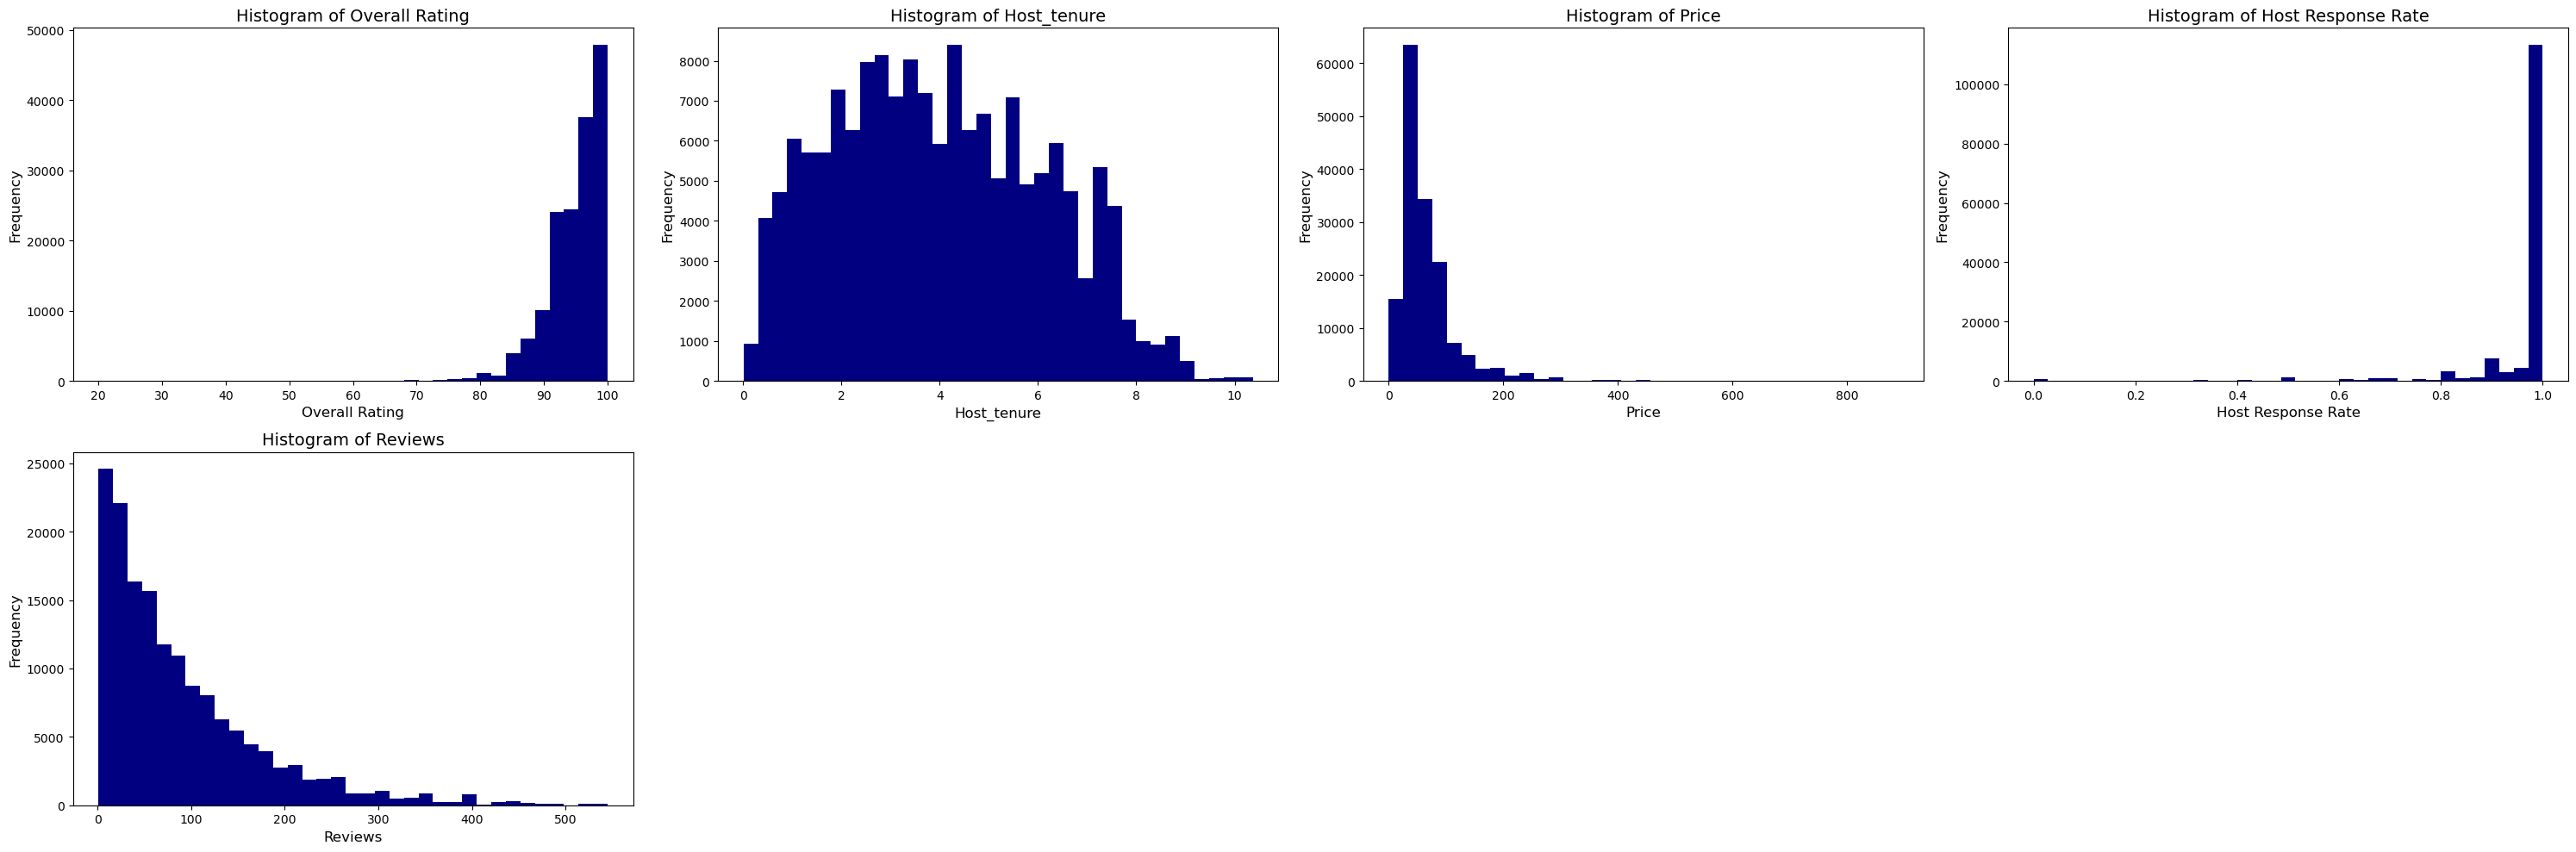

In [10]:
# Determine the number of rows needed to display all the histograms
num_cols = 4  # Number of histograms per row
num_rows = int(np.ceil(len(cols_Num) / num_cols))  # Calculate number of rows

# Create the subplots: (num_rows, num_cols) grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each numeric column and plot a histogram
for i, col in enumerate(cols_Num):
    axes[i].hist(df[col], bins=35, color='navy')
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Turn off axes for any unused subplots
for i in range(len(cols_Num), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show() 
 


## Histograms for Date feature - review date

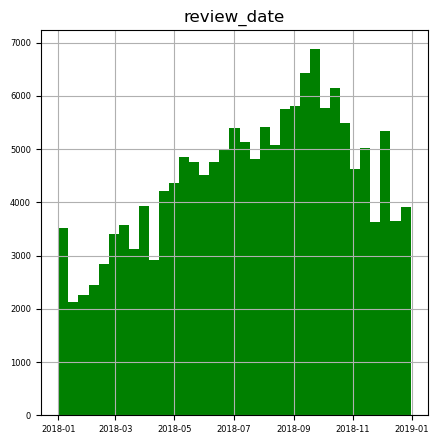

In [10]:
cols= ['review_date'] 
con_df = df[cols]
con_df.hist(figsize=(5, 5), bins=35, xlabelsize=6, ylabelsize=6, color = "green");

## Histograms for categorical features

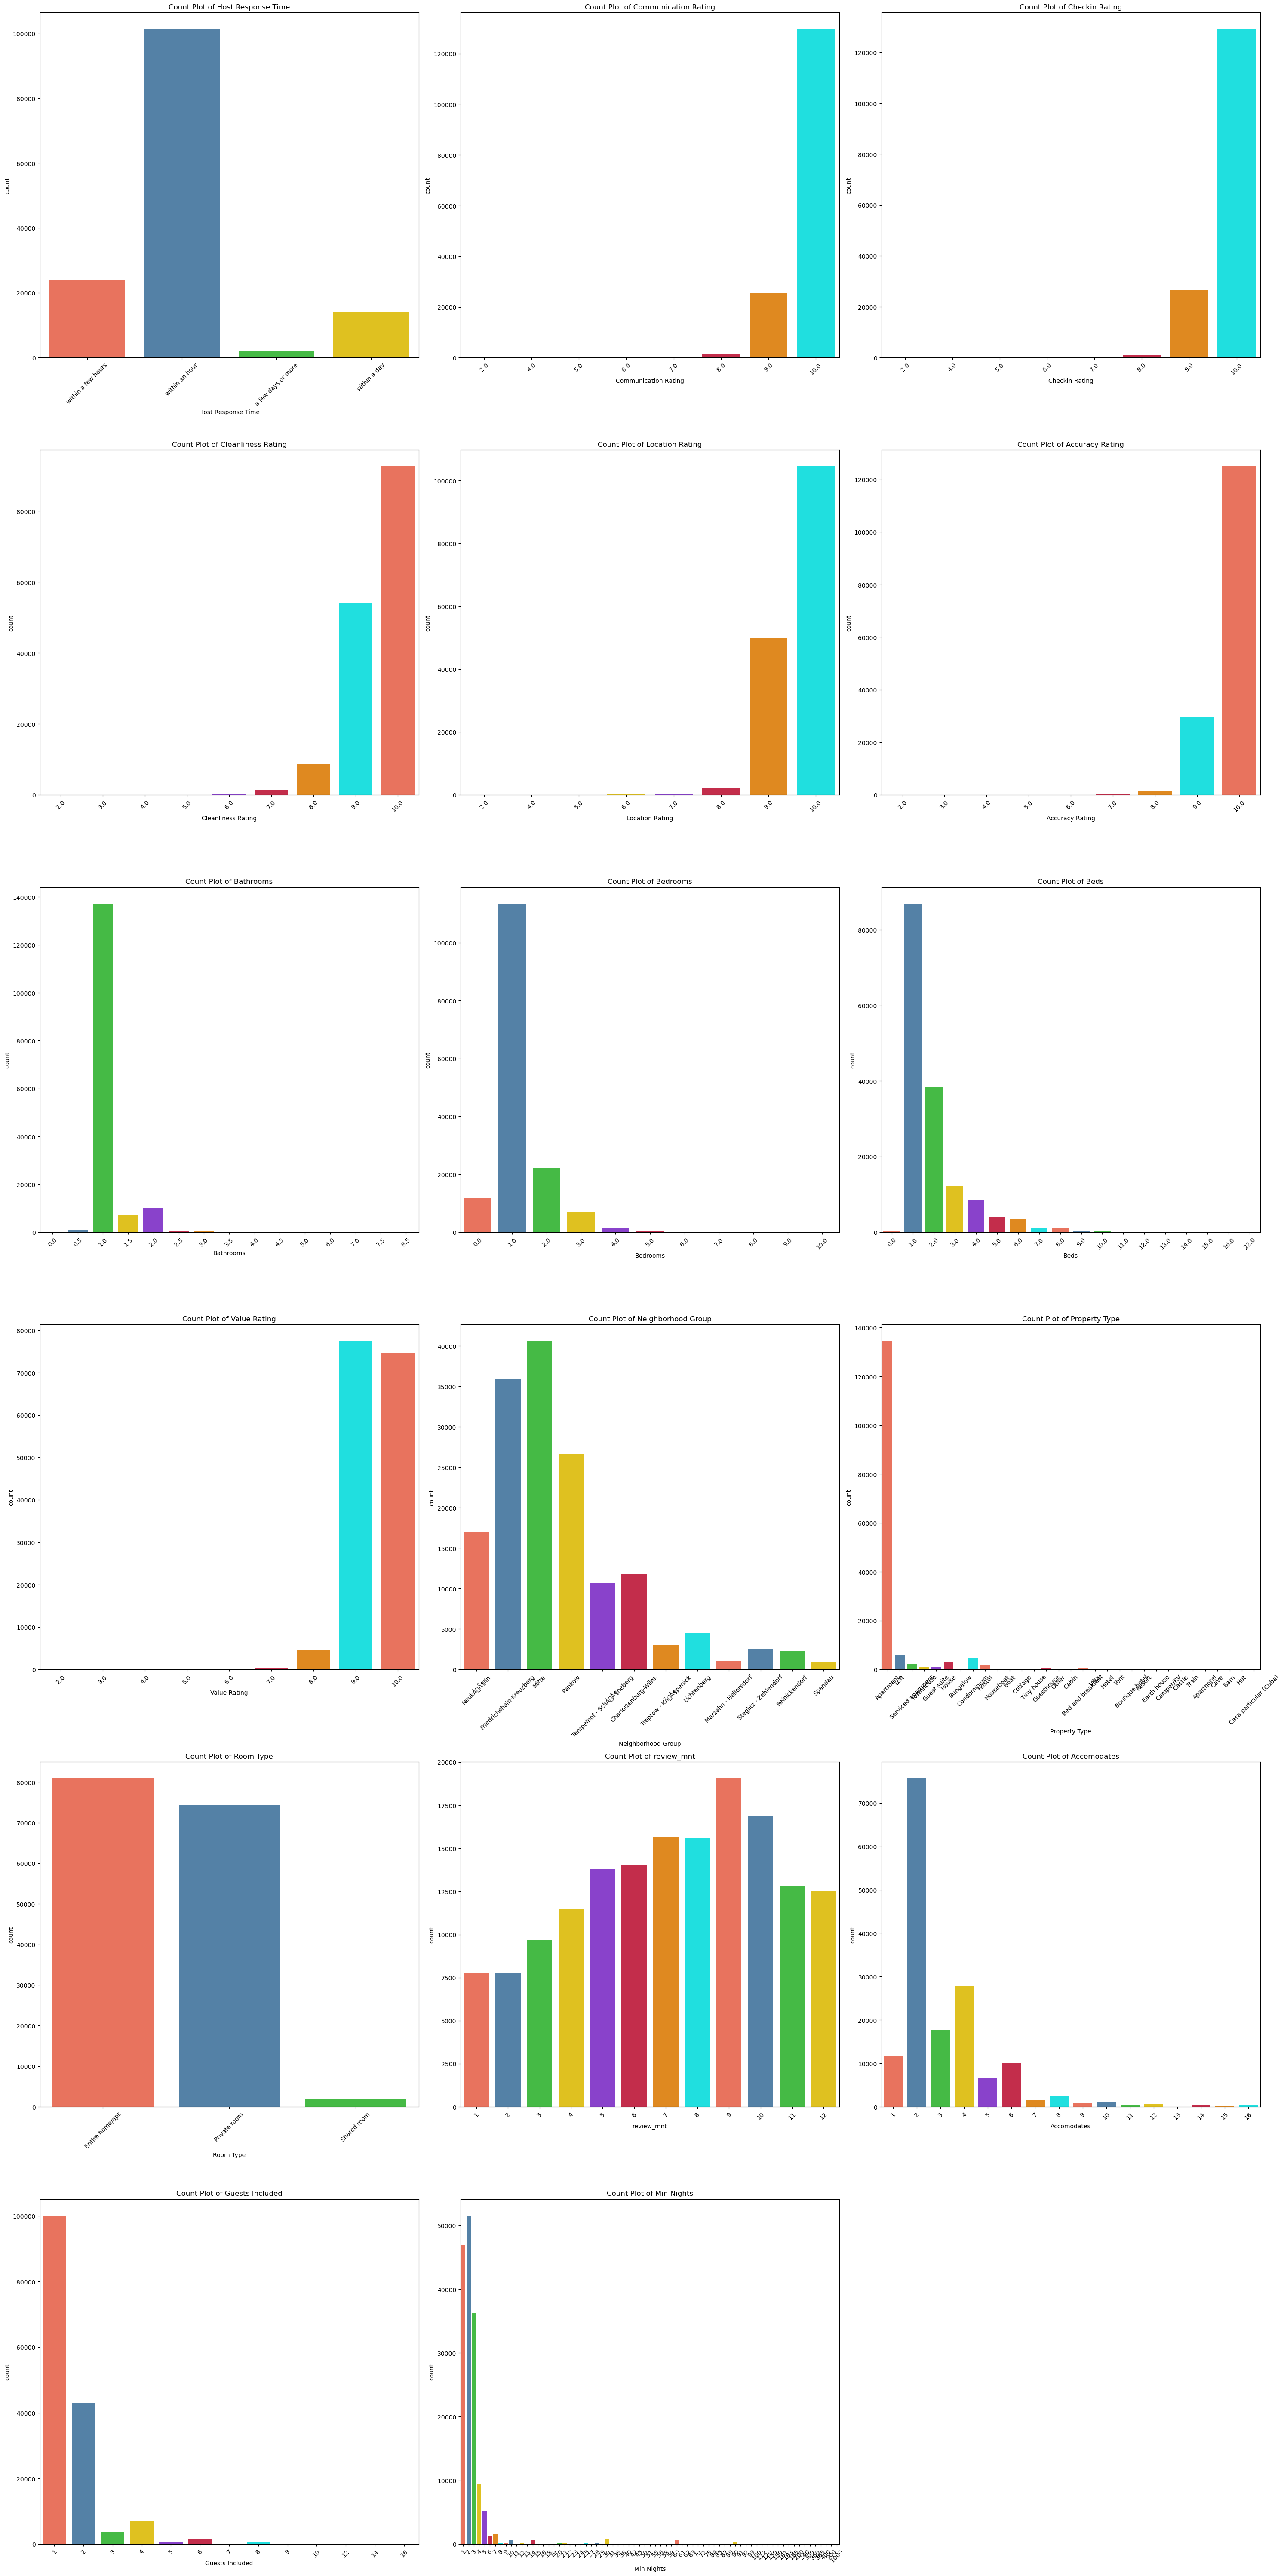

In [12]:
# Suppress all warnings
warnings.filterwarnings('ignore')

# Define a custom color palette with as many colors as there are categories
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#DC143C', '#FF8C00', '#00FFFF']

# Create a figure with subplots; adjust the number of rows and columns based on your list size
num_cols = 3  # Number of columns in the grid
num_rows = len(cols_Cat) // num_cols + (1 if len(cols_Cat) % num_cols > 0 else 0)

plt.figure(figsize=(30, num_rows * 10))  # Adjust the figure size to fit all plots

# Loop through each feature and plot the countplot in the corresponding subplot
for i, feature in enumerate(cols_Cat):
    plt.subplot(num_rows, num_cols, i+1)  # Calculate the correct position in the grid
    sns.countplot(x=feature, data=df, palette=custom_palette)  # Use the custom palette
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)  # Rotate labels if necessary for readability

# Adjust layout to avoid overlapping and show the plots
plt.tight_layout()
plt.show() 


#### As can be seen in some of the features, there is insufficient representation for some of the categories. As a result we will consider uniting some of them in the feature engineering.

## Histograms for dummy features

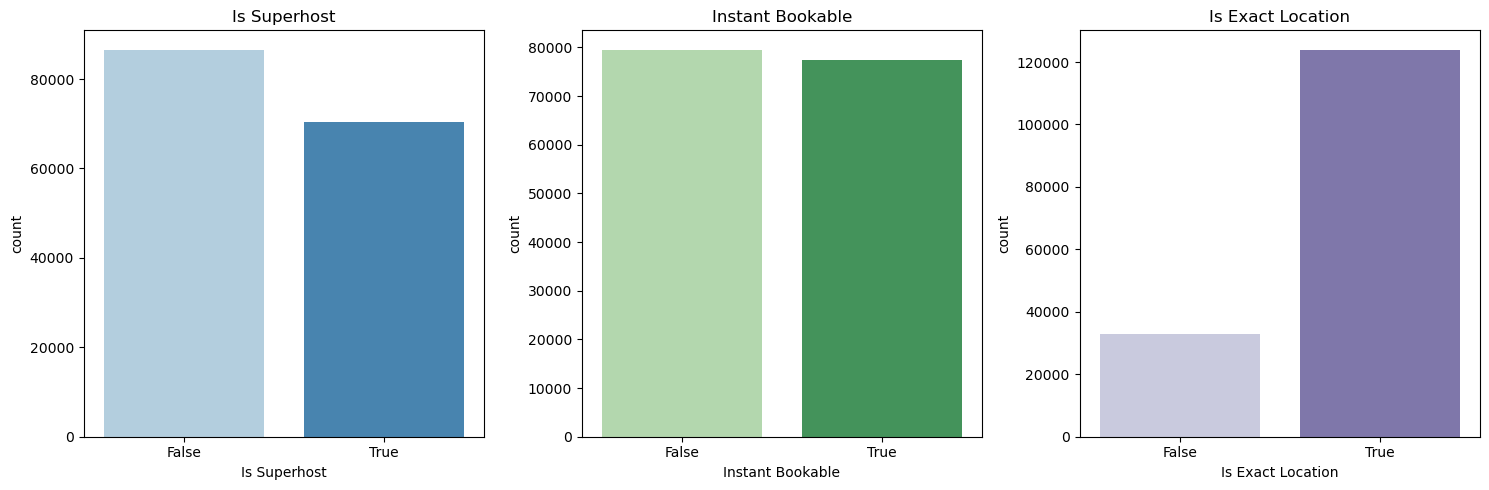

In [13]:


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each countplot on its respective axis with custom colors
sns.countplot(x='Is Superhost', data=df, ax=axes[0], palette='Blues')  # Blue color palette
sns.countplot(x='Instant Bookable', data=df, ax=axes[1], palette='Greens')  # Green color palette
sns.countplot(x='Is Exact Location', data=df, ax=axes[2], palette='Purples')  # Purple color palette

# Optional: Add titles to each subplot
axes[0].set_title('Is Superhost')
axes[1].set_title('Instant Bookable')
axes[2].set_title('Is Exact Location')

# Show the plot
plt.tight_layout()
plt.show() 

#### There is concern that column 'Is Exact Location' is represented by unbalanced data. The issue will be examined as part of the feature engineering.

# Skewness
### Assessing the distribution to determine asymmetry and potential need for transformation. 

In [14]:
#df2=df[numeric_cols]
df2=df[cols_Num]

df2

,Overall Rating,Host_tenure,Price,Host Response Rate,Reviews
45,91.0,3.956194,40.0,NaN,17
64,92.0,3.044490,80.0,NaN,13
65,92.0,3.044490,80.0,NaN,13
66,92.0,3.044490,80.0,NaN,13
71,100.0,3.164956,32.0,NaN,5
...,...,...,...,...,...
456921,98.0,4.229979,60.0,1.0,349
456922,98.0,4.229979,60.0,1.0,349
456923,98.0,4.229979,60.0,1.0,349
456924,98.0,4.229979,60.0,1.0,349


#### This function calculates the skewness of numerical columns in a DataFrame and categorizes each column as approximately normal, moderately skewed, or highly skewed based on its skewness value. It then prints the skewness for each column and provides a summary of how many columns fall into each category.

In [15]:
#

from scipy.stats import skew

def check_normality_based_on_skewness(df):
    normal_count = 0
    non_normal_count = 0
    # Iterate over each column and calculate skewness
    for column in df.select_dtypes(include=['number']):
        column_data = df[column]
        skewness = skew(column_data.dropna()) if np.sum(~column_data.isnull()) > 0 else np.nan
        # Check skewness and update counts
        if not np.isnan(skewness):
            if -0.5 <= skewness <= 0.5:
                print(f'{column} - Skewness: {skewness:.2f} => The data is approximately normal.')
                normal_count += 1
            elif -1 <= skewness < -0.5 or 0.5 < skewness <= 1:
                print(f'{column} - Skewness: {skewness:.2f} => The data is moderately skewed.')
                non_normal_count += 1
            else:
                print(f'{column} - Skewness: {skewness:.2f} => The data is highly skewed.')
                non_normal_count += 1
        else:
            print(f'{column} - Skewness: Not applicable (only NaN values)')
    # Print total counts
    print("\nSummary:")
    print(f'Total Normal Features: {normal_count}')
    print(f'Total Non-Normal Features: {non_normal_count}')

# Apply the function to check normality

check_normality_based_on_skewness(df2)


Overall Rating - Skewness: -1.97 => The data is highly skewed.
Host_tenure - Skewness: 0.23 => The data is approximately normal.
Price - Skewness: 3.17 => The data is highly skewed.
Host Response Rate - Skewness: -4.74 => The data is highly skewed.
Reviews - Skewness: 1.69 => The data is highly skewed.

Summary:
Total Normal Features: 1
Total Non-Normal Features: 4


#### The Skewness test shows our dataset has 4 non-normal features and 1 normal feature. 
#### Hence, our correlation test will be based on Spearman for the numerical features.

# Spearman
### Evaluating the monotonic relationship between variables without assuming linearity. 

#### Calculates the Spearman's Rank Correlation matrix for the numerical columns in a DataFrame and visualizes it as a heatmap. The heatmap uses color gradients and annotated values to show the strength and direction of correlations between pairs of columns.

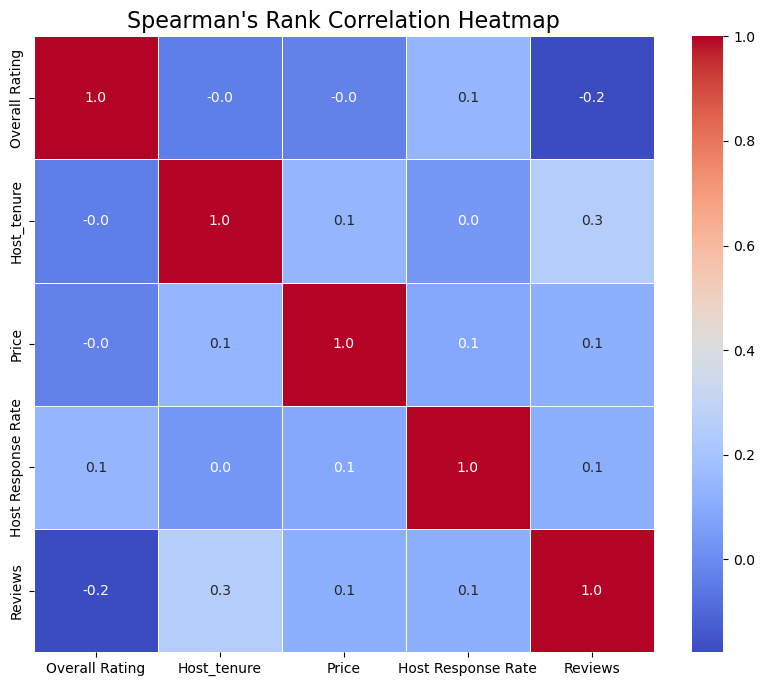

In [17]:
# Compute the Spearman's Rank Correlation matrix
spearman_corr = df[cols_Num].corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with annotated numbers
sns.heatmap(spearman_corr, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, 
            annot_kws={"size": 10}, linewidths=0.5)

# Add title and labels
plt.title("Spearman's Rank Correlation Heatmap", fontsize=16)
plt.show() 

In [18]:
cols_bol_cat=cols_Cat+cols_Bol #for chi


# Chi-Square - Correlation examination for categorial features
### Assessing the independence between categorical variables by comparing observed and expected frequencies. 

#### This code performs the Chi-Square test of independence for each pair of categorical features in a DataFrame, testing whether the variables are significantly related. It prints the Chi-Square statistic and p-value for each pair to assess their association

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations


# Function to perform Chi-Square Test for each pair of categorical features
def chi_square_test(df, cols_bol_cat):
    for col1, col2 in combinations(cols_bol_cat, 2):
        # Create a contingency table for the two categorical variables
        contingency_table = pd.crosstab(df[col1], df[col2])
        
        # Perform the Chi-Square test
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Print the result
        print(f"Chi-Square Test between {col1} and {col2}:")
        print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p_value:.4f}")
        print("-" * 50)

# Check if df is a DataFrame before running the function
if isinstance(df, pd.DataFrame):
    chi_square_test(df, cols_bol_cat)
elif isinstance(df, pd.core.groupby.DataFrameGroupBy):
    df = df.obj  # Extract the original DataFrame from the GroupBy object
    chi_square_test(df, cols_bol_cat)
else:
    print("Error: df is not a DataFrame or GroupBy object.")



Chi-Square Test between Host Response Time and Communication Rating:
Chi-Square Statistic: 1412.93, p-value: 0.0000
--------------------------------------------------
Chi-Square Test between Host Response Time and Checkin Rating:
Chi-Square Statistic: 748.82, p-value: 0.0000
--------------------------------------------------
Chi-Square Test between Host Response Time and Cleanliness Rating:
Chi-Square Statistic: 931.70, p-value: 0.0000
--------------------------------------------------
Chi-Square Test between Host Response Time and Location Rating:
Chi-Square Statistic: 488.76, p-value: 0.0000
--------------------------------------------------
Chi-Square Test between Host Response Time and Accuracy Rating:
Chi-Square Statistic: 564.91, p-value: 0.0000
--------------------------------------------------
Chi-Square Test between Host Response Time and Bathrooms:
Chi-Square Statistic: 537.03, p-value: 0.0000
--------------------------------------------------
Chi-Square Test between Host Res

#### •	Almost all of the relationships tested are highly significant (p-value = 0.0000), which means the variables (ratings, property details, booking features) we tested are closely related to each other.

#### •	The only exception is the review_mnt variable, where the association with Communication Rating is weak but still statistically significant.
##### Chi-Square Test between Communication Rating and review_mnt: (Chi-Square Statistic: 95.07, p-value: 0.0795)



## Outliers Review

#### Outlier Detection: Identifying data points that deviate significantly from the overall distribution to assess their impact on analysis. 

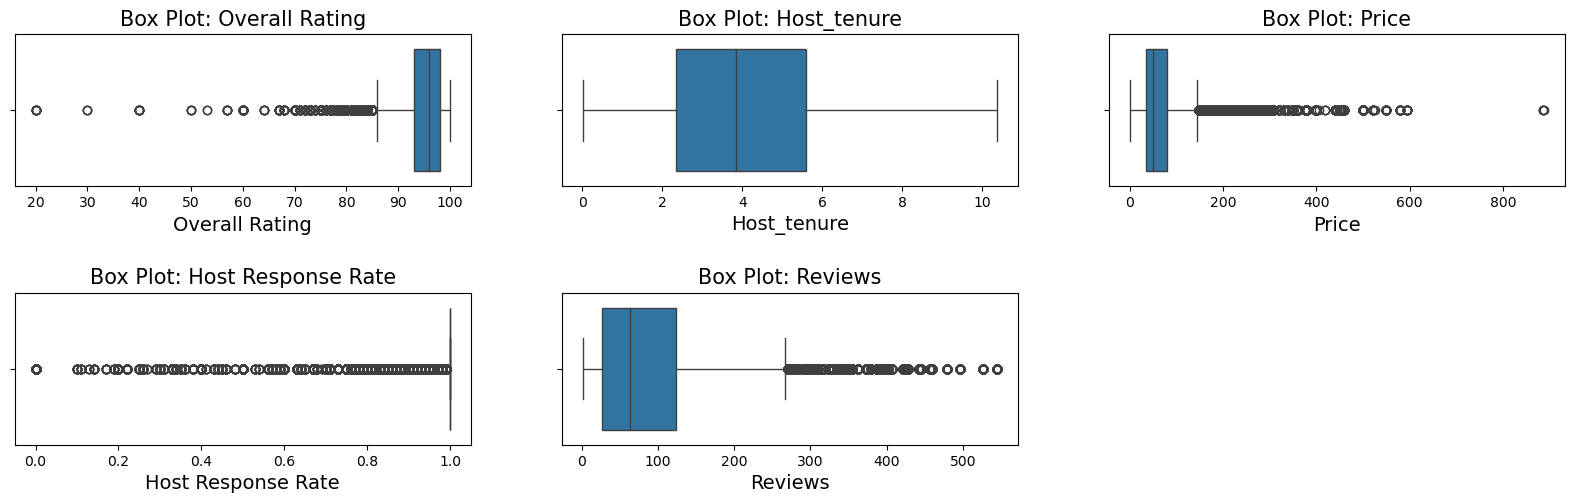

In [20]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        if col != 'host_is_superhost':
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(df2)

#### Our final decision is to not delete the outliers of our numeric feature due to the following reasons:

 - Overall rating & Host response rate: The data in the columns related to the ratings are influenced by the raters' satisfaction. These columns contain outliers due to low ratings, which are less frequent compared to the high ratings. We believe this is important information and should not be deleted.

 - Price: this feature contains seemingly outlier values due to more expensive assets compared to the average. We believe that high prices represent some of the existing assets, so we would prefer to keep them


In [21]:
cols_Cat= ['Host Response Time','Communication Rating','Checkin Rating',
           'Cleanliness Rating','Location Rating','Accuracy Rating','Bathrooms','Bedrooms','Beds','Value Rating',
           'Neighborhood Group','Property Type', 'Room Type','review_mnt','Accomodates'
          ,'Guests Included','Min Nights']

cols_Bol=['Is Superhost','Is Exact Location','Instant Bookable']

# List of numeric columns in your dataset
cols_Num = ['Overall Rating','Host_tenure','Price','Host Response Rate','Reviews']

## Imputing Missing values:

#### Handling missing values by filling in gaps with appropriate estimates to maintain dataset integrity. 

In [22]:
# Replacing missing values 
# For the variable 'Comments' with STRING 'unknown' 

df['Comments'] =df['Comments'].fillna('unknown') 
df['Listing Name'] =df['Listing Name'].fillna('unknown') 
df['Host Response Time'] =df['Host Response Time'].fillna('unknown') 

# Bathrooms               
# Replacing missing values 
# For the variable 'Host Response Rate' with FLOAT 0

df['Host Response Rate'] =df['Host Response Rate'].fillna(0) 

## MICE Imputation
#### Filling missing data by creating multiple estimates to improve data accuracy. 

In [23]:
df['Host Response Rate'].value_counts(dropna=False) 

Host Response Rate
1.00    110388
0.00     16627
0.90      6131
0.80      2696
0.99      2616
         ...  
0.11         7
0.41         5
0.13         4
0.69         3
0.27         3
Name: count, Length: 70, dtype: int64

In [24]:
df['Host Response Rate'].isna().sum()

0

In [25]:
df.isna().sum()

review_date               0
Comments                  0
Listing ID                0
Listing Name              0
Host ID                   0
Host Response Time        0
Host Response Rate        0
Is Superhost              0
Neighborhood Group        0
Latitude                  0
Longitude                 0
Is Exact Location         0
Property Type             0
Room Type                 0
Accomodates               0
Bathrooms               135
Bedrooms                181
Beds                     25
Price                    51
Guests Included           0
Min Nights                0
Reviews                   0
First Review              0
Last Review               0
Overall Rating          165
Accuracy Rating         164
Cleanliness Rating      164
Checkin Rating          167
Communication Rating    166
Location Rating         167
Value Rating            167
Instant Bookable          0
review_mnt                0
Host_tenure               0
dtype: int64

In [26]:
df['Price'].isna().sum()

51

In [27]:
# Apply MICE only to numeric columns
imputer = IterativeImputer()
df[cols_Num] = imputer.fit_transform(df[cols_Num])


In [28]:
df['Price'].isna().sum()

0

In [29]:
df['Host Response Rate'].value_counts(dropna=False) 

Host Response Rate
1.00    110388
0.00     16627
0.90      6131
0.80      2696
0.99      2616
         ...  
0.11         7
0.41         5
0.13         4
0.69         3
0.27         3
Name: count, Length: 70, dtype: int64

In [30]:
df['Host Response Rate'].isna().sum()

0

In [31]:
df['Price'].isna().sum()

0

In [32]:
df.isna().sum()

review_date               0
Comments                  0
Listing ID                0
Listing Name              0
Host ID                   0
Host Response Time        0
Host Response Rate        0
Is Superhost              0
Neighborhood Group        0
Latitude                  0
Longitude                 0
Is Exact Location         0
Property Type             0
Room Type                 0
Accomodates               0
Bathrooms               135
Bedrooms                181
Beds                     25
Price                     0
Guests Included           0
Min Nights                0
Reviews                   0
First Review              0
Last Review               0
Overall Rating            0
Accuracy Rating         164
Cleanliness Rating      164
Checkin Rating          167
Communication Rating    166
Location Rating         167
Value Rating            167
Instant Bookable          0
review_mnt                0
Host_tenure               0
dtype: int64

In [33]:
# עבור כל עמודה ב-DataFrame
for column in df.columns:
    if df[column].isnull().sum() > 0:
        # קבלת כל הערכים הקיימים בעמודה (ללא ערכים חסרים)
        existing_values = df[column].dropna().values
        
        # דגימה אקראית מתוך הערכים הקיימים למילוי הערכים החסרים
        random_values = np.random.choice(existing_values, size=df[column].isnull().sum(), replace=True)
        
        # עדכון הערכים החסרים בעמודה עם הערכים שנדגמו
        df[column].loc[df[column].isnull()] = random_values 
 


# Verify if there are still any missing values
print(df.isna().sum()) 

review_date             0
Comments                0
Listing ID              0
Listing Name            0
Host ID                 0
Host Response Time      0
Host Response Rate      0
Is Superhost            0
Neighborhood Group      0
Latitude                0
Longitude               0
Is Exact Location       0
Property Type           0
Room Type               0
Accomodates             0
Bathrooms               0
Bedrooms                0
Beds                    0
Price                   0
Guests Included         0
Min Nights              0
Reviews                 0
First Review            0
Last Review             0
Overall Rating          0
Accuracy Rating         0
Cleanliness Rating      0
Checkin Rating          0
Communication Rating    0
Location Rating         0
Value Rating            0
Instant Bookable        0
review_mnt              0
Host_tenure             0
dtype: int64


In [37]:
df.to_pickle(r'\\popnasal07.bnhpgroup.com\Departments\DIGITALFACTORY\GENERAL\קורס DS - AIRBNB\eda.pkl') 